## Comparing precision/recall results for specifity-based random walk scheme $R2V_{Sp}$ where specificity is computed based on $N_{walks}$ = 100, 1000, and 10000


Plotting Lord of the Rings
k@[3]


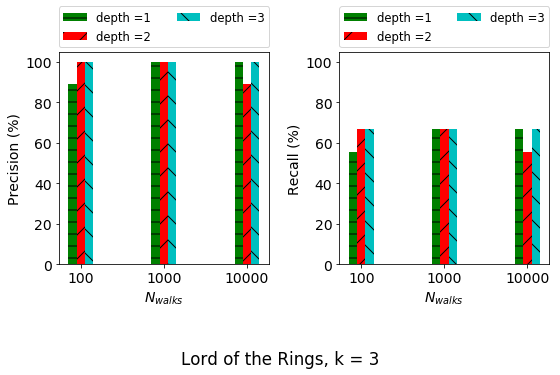

Plotting Star Wars
k@[5]


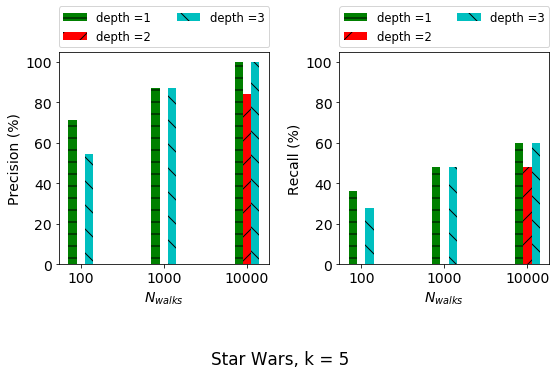

Plotting Superman
k@[4]


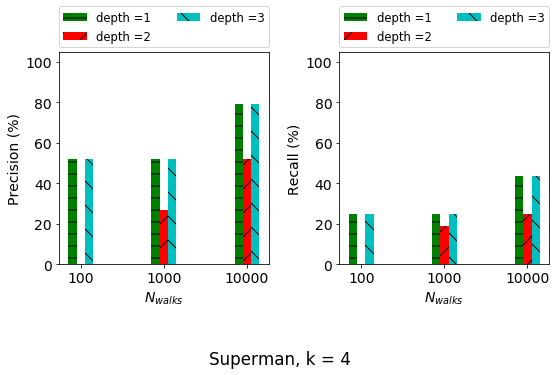

Plotting Batman
k@[5]


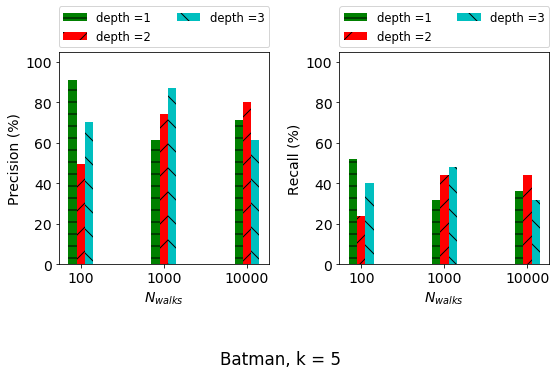

Plotting Spiderman
k@[2]


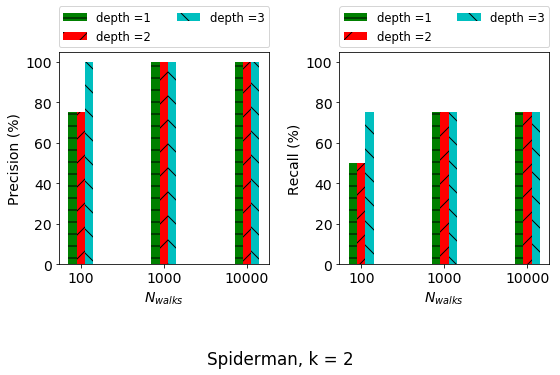

Plotting Star Trek
k@[9]


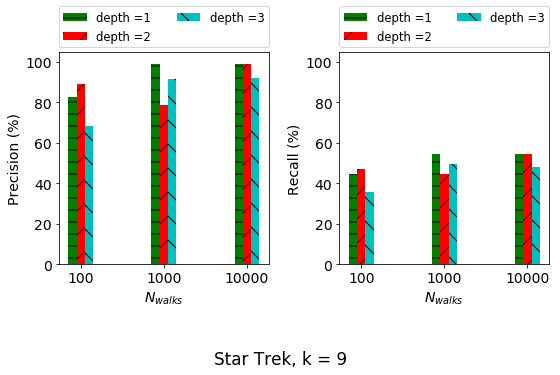

Plotting Indiana Jones
k@[3]


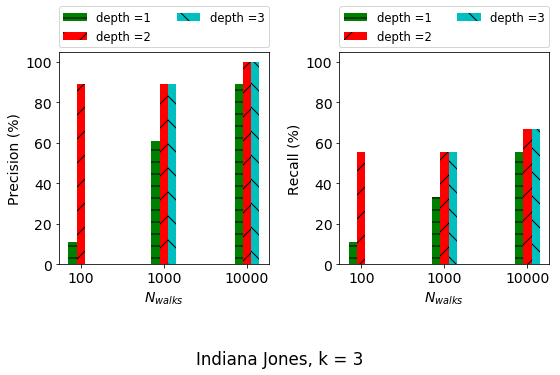

Plotting Back to the Future
k@[3]


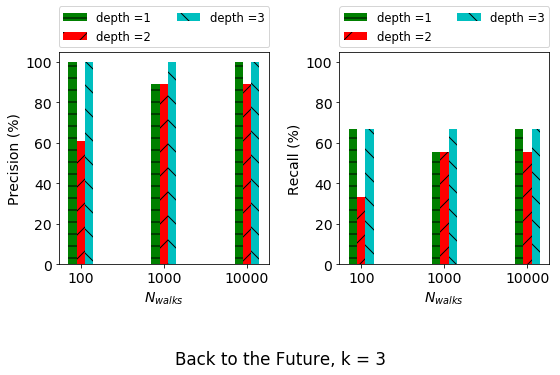

Plotting Harry Potter
k@[5]


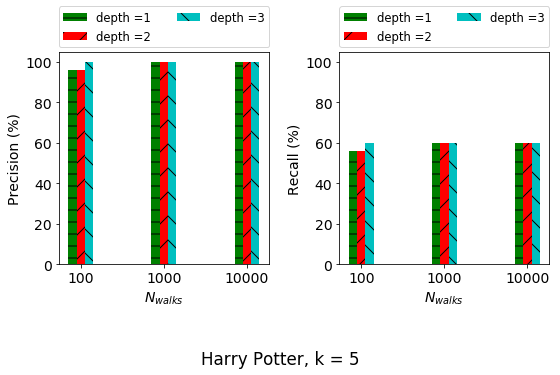

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


labels = ["NRSE","NRSE'","UE","UEP","NRST","NRST'","$R2V_{PR}$","$R2V$","$R2V$","$R2V_{Sp}$","$NRSE_{Sp}$","NRSE'-Sp","$UE_{Sp}$","$UEP_{Sp}$","$NRST_{Sp}$","NRST'-Sp","$UET_{Sp}$","$UETP_{Sp}$"]
styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']
depths2 = list([1,2,3])
plotWidth = 8
plotHeight = 4

barstyles = ['g', 'r', 'c', 'y']
patterns = ('-', '/', '\\', 'x', '\\', '*', 'o', 'O', '.')

cases = (10,)#,11,13,15,17)
labelsX = [labels[i-1] for i in cases]

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 14}
matplotlib.rc('font', **font)
    
movies = ('lotr', 'starwars', 'superman', 'batman', 'spiderman', 'startrek','indiana','bttf','harry')
movieLabels = ('Lord of the Rings', 'Star Wars', 'Superman', 'Batman', 'Spiderman', 'Star Trek','Indiana Jones'
               ,'Back to the Future','Harry Potter')

N = (100,1000,10000)

for i in np.arange(0,len(movies)):

    movie = movies[i]
    print('Plotting ' + movieLabels[i])
    resultsFiles = (open('./iswc/N100/' + 'results/' + movie + '_20180510-1712_avg.txt', 'r')
                   , open('./iswc/N1000/' + 'results/' + movie + '_20180509-1227_avg.txt', 'r')
                    , open('./iswc/N10000/' + 'results/' + movie + '_20180509-1236_avg.txt', 'r'))

    datalist = []
    #datalist10000 = []
    for ii in np.arange(0,len(resultsFiles)):
        for line in resultsFiles[ii]:
            line = line.rstrip('\n')
            words = line.split('\t')
            scheme = words[0]
            currcase = int(scheme[scheme.index('case_')+5:scheme.index('_d')])
            k = int(words[1])
            precision = float(words[2])
            recall = float(words[3])
            if (precision == 0 and recall == 0):
                fscore = 0.0
            else:
                fscore = 2*(precision*recall)/(precision+recall)
            if currcase not in cases:
                continue
            datalist.append([scheme, currcase, k, precision, recall, fscore, N[ii]])

    sortedData = sorted(datalist, key=lambda result:result[6])

    kvals = np.sort(np.unique([s[2] for s in sortedData]))
    kvals = [np.max(kvals)]
    print('k@' + str(kvals))
    
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(plotWidth,plotHeight))
    
    for k in np.arange(0,len(kvals)):
        plt.subplot(1,2,1)#, figsize=(plotWidth,plotHeight))
        bar_width = 0.1
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[3] for y in data]
            intlabelcases = np.arange(1,len(N)+1)
            plt.bar(-0.1 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1
        
    plt.ylim(0.0, 105.0)
    plt.ylabel('Precision (%)')
    plt.xlabel('$N_{walks}$')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=2, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, N)#, rotation=45)
        #fig.tight_layout()
    #plt.savefig(outputDir + movie + '_' + str(kvals[k]) + '_precision.pdf', format='pdf', dpi=600, bbox_inches='tight')
    for k in np.arange(0,len(kvals)):
        plt.subplot(1,2,2)#, figsize=(plotWidth,plotHeight))
        bar_width = 0.1
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[4] for y in data]
            intlabelcases = np.arange(1,len(N)+1)
            plt.bar(-0.1 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1
        
    plt.ylim(0.0, 105.0)
    plt.ylabel('Recall (%)')
    plt.xlabel('$N_{walks}$')
    plt.xticks(intlabelcases, N)
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=2, mode="expand", borderaxespad=0.)
    plt.tight_layout()
    fig.suptitle(movieLabels[i] + ', k = ' + str(kvals[0]), x = 0.5, y = -0.1)
    fig.savefig('results/' + movie + '_' + str(kvals[k]) + '_results.pdf', format='pdf', dpi=600, bbox_inches='tight')

    
    plt.show()
    #close(fig)

## Comparing precision/recall results for specifity-based random walk scheme $R2V_{Sp}$ where specificity is computed based on $|S|$ = 20, 200, 2000


Plotting Lord of the Rings
k@[3]


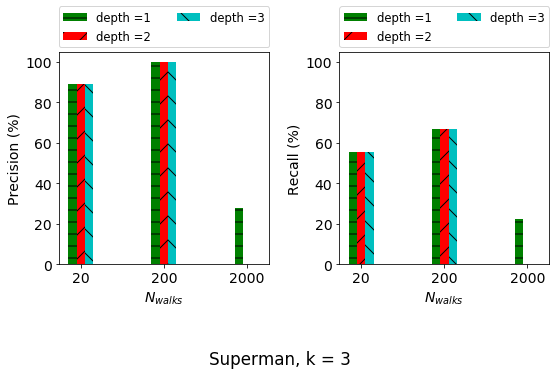

Plotting Star Wars
k@[5]


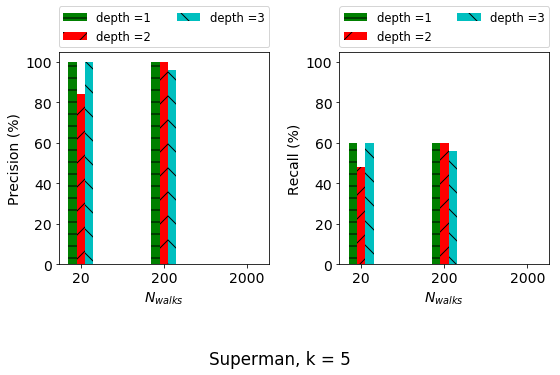

Plotting Superman
k@[4]


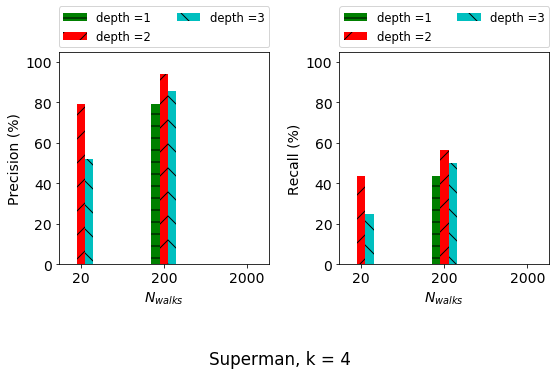

Plotting Batman
k@[5]


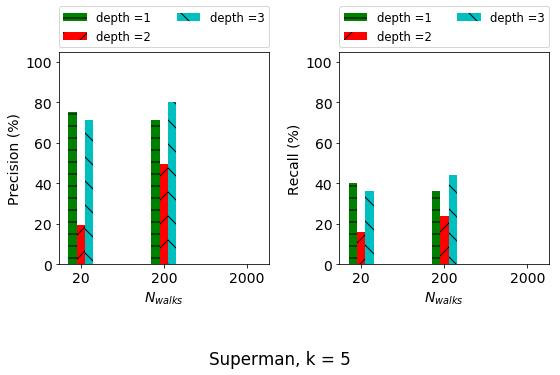

Plotting Spiderman
k@[2]


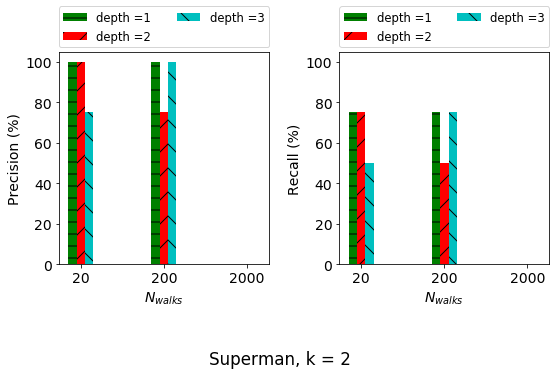

Plotting Star Trek
k@[9]


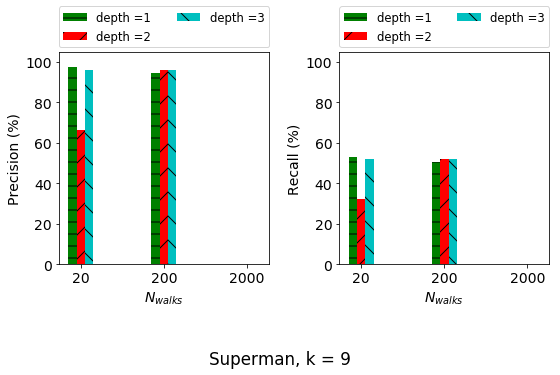

Plotting Indiana Jones
k@[3]


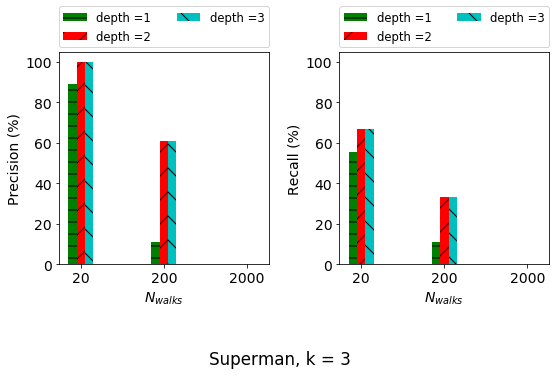

Plotting Back to the Future
k@[3]


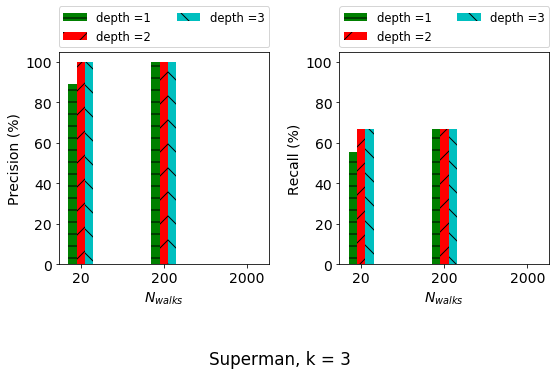

Plotting Harry Potter
k@[5]


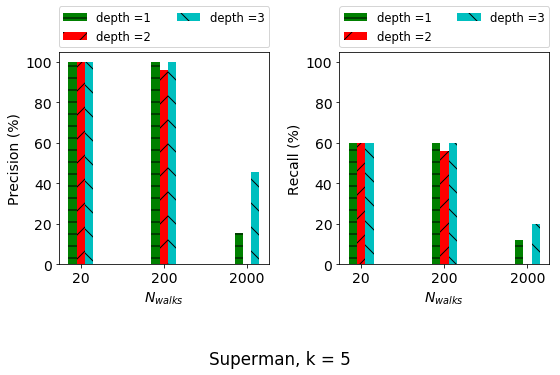

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-','b:', 'r:', 'g:', 'y:','c:','m:','k:']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']

depths2 = list([1,2,3])
plotWidth = 8
plotHeight = 4

barstyles = ['g', 'r', 'c', 'y']
patterns = ('-', '/', '\\', 'x', '\\', '*', 'o', 'O', '.')

cases = (10,)#,11,13,15,17)
labelsX = [labels[i-1] for i in cases]

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 14}
matplotlib.rc('font', **font)
    
movies = ('lotr', 'starwars', 'superman', 'batman', 'spiderman', 'startrek','indiana','bttf','harry')
movieLabels = ('Lord of the Rings', 'Star Wars', 'Superman', 'Batman', 'Spiderman', 'Star Trek','Indiana Jones'
               ,'Back to the Future','Harry Potter')

N = (20,200,2000)

for i in np.arange(0,len(movies)):

    movie = movies[i]
    print('Plotting ' + movieLabels[i])
    resultsFiles = (open('./iswc/S20/' + 'results/' + movie + '_20180510-2154_avg.txt', 'r')
                   , open('./iswc/S200/' + 'results/' + movie + '_20180510-1715_avg.txt', 'r')
                    , open('./iswc/S2000/' + 'results/' + movie + '_20180510-1717_avg.txt', 'r'))

    datalist = []
    #datalist10000 = []
    for i in np.arange(0,len(resultsFiles)):
        for line in resultsFiles[i]:
            line = line.rstrip('\n')
            words = line.split('\t')
            scheme = words[0]
            currcase = int(scheme[scheme.index('case_')+5:scheme.index('_d')])
            k = int(words[1])
            precision = float(words[2])
            recall = float(words[3])
            if (precision == 0 and recall == 0):
                fscore = 0.0
            else:
                fscore = 2*(precision*recall)/(precision+recall)
            if currcase not in cases:
                continue
            datalist.append([scheme, currcase, k, precision, recall, fscore, N[i]])

    sortedData = sorted(datalist, key=lambda result:result[6])

    kvals = np.sort(np.unique([s[2] for s in sortedData]))
    kvals = [np.max(kvals)]
    print('k@' + str(kvals))
    
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(plotWidth,plotHeight))
    
    for k in np.arange(0,len(kvals)):
        plt.subplot(1,2,1)#, figsize=(plotWidth,plotHeight))
        bar_width = 0.1
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[3] for y in data]
            intlabelcases = np.arange(1,len(N)+1)
            plt.bar(-0.1 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1
        
    plt.ylim(0.0, 105.0)
    plt.ylabel('Precision (%)')
    plt.xlabel('$N_{walks}$')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=2, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, N)#, rotation=45)
        #fig.tight_layout()
    #plt.savefig(outputDir + movie + '_' + str(kvals[k]) + '_precision.pdf', format='pdf', dpi=600, bbox_inches='tight')
    for k in np.arange(0,len(kvals)):
        plt.subplot(1,2,2)#, figsize=(plotWidth,plotHeight))
        bar_width = 0.1
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[4] for y in data]
            intlabelcases = np.arange(1,len(N)+1)
            plt.bar(-0.1 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1
        
    plt.ylim(0.0, 105.0)
    plt.ylabel('Recall (%)')
    plt.xlabel('$N_{walks}$')
    plt.xticks(intlabelcases, N)
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=2, mode="expand", borderaxespad=0.)
    
    plt.tight_layout()
    fig.suptitle(movieLabels[i] + ', k = ' + str(kvals[0]), x = 0.5, y = -0.1)
    fig.savefig('results/' + movie + '_' + str(kvals[k]) + '_results.pdf', format='pdf', dpi=600, bbox_inches='tight')
    plt.show()
    #close(fig)

If all other parameters are kept fixed, a high number of entities can lead to poor results for precision and recall. The reason is that mores entities require parameters of line 5 in Algorithm 1 (in the paper) to be adjusted accordingly. Otherwisee, a good representative set of semantic relationships won't be captured for specificity computations in line 6.